# Save the Factory: Feature Engineering Challenge

<img src="https://drive.google.com/uc?id=1QjV8Th9fOK89MhgV-Y1Irn7dTl7ZheP0" width="650">

## Background

In the whimsical town of Widgetville, the mighty Widget Corp stands as the centerpiece, crafting widgets of unmatched quality with a **Ruby** and **Sapphire** magic stones inside. But recently, a trickster sprite seems to have infiltrated the assembly lines, introducing problems and faults to widgets's working procedure and labels. As the company’s freshly appointed Chief Engineering Detective, you are tasked with a mission to unravel this puzzling situation.

## Task

- Your ultimate goal is to effectively classify widgets into two classes: **Ruby** and **Sapphire**.

- You have recovered the labels for a previous month's supply of widgets, and should use these to classify the remaining widgets.

- For every widget, you have an access to the so-called "The Pulse of the Machine" -- a unique numerical representation of each widget, which features 8 magic threads (represented by 178 numbers) woven into the central timeless crystal.
Therefore, each widget is described by (178 x 8) array. You must use these data to recover the **Ruby** and **Sapphire** labels.

- You need to engineer discerning features from the **Pulse of the Machine**, since efficient factory procedures allow you to **only use Decision Tree Classifier** with a limited tree depth as a model, with no hyperparameters change allowed.
  - You can read more about Decision Trees in scikit-learn documentation:
    - https://en.wikipedia.org/wiki/Decision_tree
    - https://scikit-learn.org/stable/modules/tree.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
  
- You have two levels of difficulty, producing **Efficient** and **Super Duper Efficient** solutions. These vary by the allowed tree depth.

- Your classification success will be measured by the ROC AUC metric
  - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

- Your solution for each task should not exceed 3 minutes for training from scratch and 1 minute for inference on the test set on the standard Colab non-GPU instance. This includes features generation.

## Deliverables

- We will share the test data 48 hours before the deadline

- Use test data to create `efficient_test_predictions.txt` and `super_duper_efficient_test_predictions.txt` and share these files with us

- Also share this notebook containing your solution so we can reproduce your results and check the time constraints

## Tips
- Aim to create a minimal yet mighty set of derivative features to maintain the elegance and effectiveness of your tools.
- The crystals are indeed **timeless** -- be aware that there are no time series involved.
- There was a rumor that not only labels, but the data itself was corrupted by evil spirits. Is there a way for a possible recovery?
- Ensure your solutions are as clear as the crystal waters of Widgetville’s famed springs by providing them with sufficient documentation.

# Below goes data loading and visualization

In [3]:
import pandas as pd
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [4]:
!gdown 1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA

Downloading...
From (original): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA
From (redirected): https://drive.google.com/uc?id=1eIrRyAqckN6zCjPb9VS-2rw7Bup7YhsA&confirm=t&uuid=0383c821-39f5-4742-89f6-f05d30aeeb8d
To: /content/FE_hometask_data_v3.pickle
100% 260M/260M [00:05<00:00, 47.8MB/s]


In [5]:
data = pd.read_pickle('FE_hometask_data_v3.pickle')
for key in data.keys():
  print(key)

train
val


In [6]:
X_train = np.array([x[0] for x in data['train'].values()])
y_train = np.array([x[1] for x in data['train'].values()])

X_val = np.array([x[0] for x in data['val'].values()])
y_val = np.array([x[1] for x in data['val'].values()])
# this is temporary as we'll share the test data later
X_test = X_val

In [7]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((20240, 187, 8), (20240,), (1456, 187, 8), (1456,), (1456, 187, 8))

In [8]:
def vis(arr, color='r'):
  widget_type = 'Ruby' if color == 'r' else 'Sapphire'
  plt.figure(figsize=(12, 8))
  for cnt in range(8):
    plt.plot(arr[:, cnt], color=color, alpha=.2 + .1*cnt)
  plt.grid()
  plt.title(f'Pulse of the Machine for {widget_type}')

In [9]:
y_train[4], y_train[5]

(False, False)

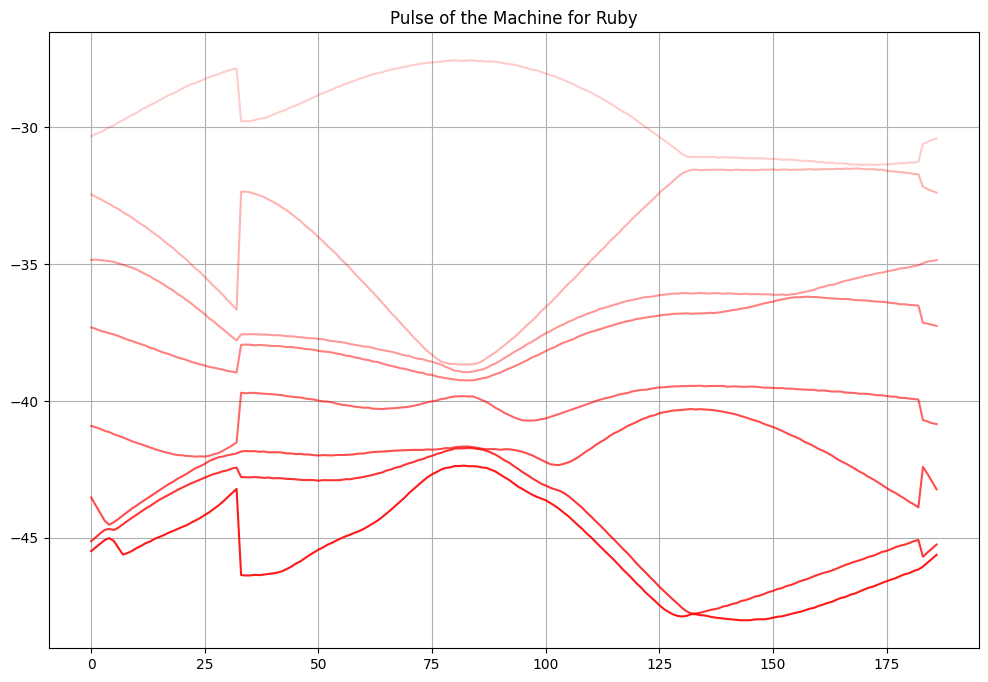

In [10]:
vis(X_train[3], 'r')

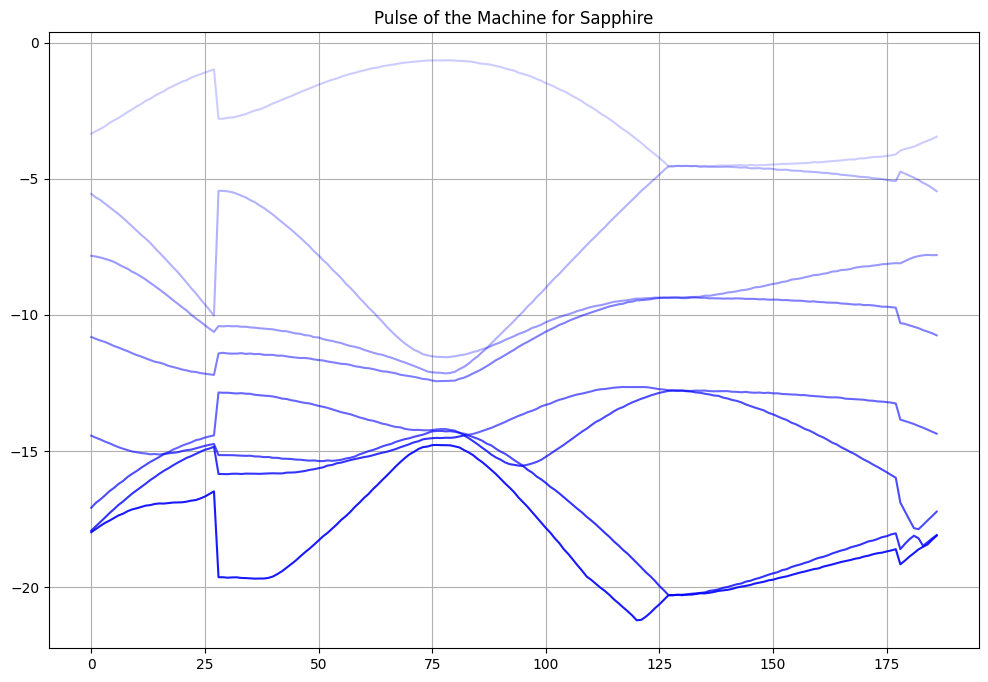

In [11]:
vis(X_train[5], 'b')

# Functions to evaluate the results
N.B. Do not change it!

In [12]:
def efficient_eval(train_features, val_features):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

def super_duper_efficient_eval(train_features, val_features):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = model.predict(val_features)
  return roc_auc_score(y_val, preds)

# Functions to write answers to files

Don't change the functions, share the files with us in your final submission.

In [13]:
def efficient_test_predictions(train_features, test_features):
  model = DecisionTreeClassifier(max_depth=20, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

def super_duper_efficient_test_predictions(train_features, test_features):
  model = DecisionTreeClassifier(max_depth=4, random_state=2024).fit(train_features, y_train)
  preds = ['1' if x else '0'
           for x in model.predict(test_features)]
  with open('super_duper_efficient_test_predictions.txt', 'w') as f:
    f.write(''.join(preds))

# Baselines: let's try some simple feature sets!
- every 10th element of a flattened array
- mean value / standard deviation by each axis

In [14]:
def feature_set_10th(X):
  print(np.reshape(X, (X.shape[0], -1))[:, ::10].shape)
  return np.reshape(X, (X.shape[0], -1))[:, ::10]

def feature_set_mean(X, axis=1):
  print(np.mean(X, axis=axis).shape)
  return np.mean(X, axis=axis)

def feature_set_std(X, axis=1):
  print(np.std(X, axis=axis).shape)
  return np.std(X, axis=axis)

In [15]:
%%time
efficient_eval(
    feature_set_10th(X_train),
    feature_set_10th(X_val)
)

(20240, 150)
(1456, 150)
CPU times: user 12.2 s, sys: 38.5 ms, total: 12.3 s
Wall time: 13.9 s


0.5001700018954235

In [16]:
%%time
super_duper_efficient_eval(
    feature_set_10th(X_train),
    feature_set_10th(X_val)
)

(20240, 150)
(1456, 150)
CPU times: user 2.32 s, sys: 5.09 ms, total: 2.33 s
Wall time: 2.33 s


0.5033726812816189

In [17]:
%%time
efficient_eval(
    feature_set_mean(X_train, axis=2),
    feature_set_mean(X_val, axis=2)
)

(20240, 187)
(1456, 187)
CPU times: user 17.7 s, sys: 36.4 ms, total: 17.7 s
Wall time: 17.8 s


0.5015876613796728

In [18]:
%%time
efficient_eval(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_val, axis=2)
)

(20240, 187)
(1456, 187)
CPU times: user 7.64 s, sys: 164 ms, total: 7.81 s
Wall time: 7.77 s


0.6392012646577783

In [19]:
%%time
super_duper_efficient_eval(
    feature_set_std(X_train, axis=1),
    feature_set_std(X_val, axis=1)
)

(20240, 8)
(1456, 8)
CPU times: user 785 ms, sys: 178 ms, total: 963 ms
Wall time: 961 ms


0.6848584978476195

Ok, for some reason `feature_set_std, axis=2` was the best.

That's how one produces results for the test set.
Don't forget to share the files with us!

In [20]:
efficient_test_predictions(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_test, axis=2)
)

(20240, 187)
(1456, 187)


In [21]:
super_duper_efficient_test_predictions(
    feature_set_std(X_train, axis=2),
    feature_set_std(X_test, axis=2)
)

(20240, 187)
(1456, 187)


# Now it's your turn to try!

In [34]:
def normalize(data):
  return (data - np.amin(data)) / (np.amax(data) - np.amin(data))

def feature_set_sample(X):
    # features = X[:, 15:25]
    # features = X[:, 165:]
    features = X[:, 75:120]
    # features = np.concatenate((X[:, 15:25], X[:, 75:120]), axis=1)

    for a in range(len(features)):
      features[a] = normalize(features[a])

    return feature_set_std(features, axis=1)

    # result = []
    # for i in range(len(features)):
    #     for j in range(len(features[i])):
    #         my_list = []
    #         for k in range(len(features[i][j])):
    #             my_list.append(features[i][j][k])
    #     result.append(my_list)

    # arr = np.array(result)
    # return result

In [35]:
%%time
super_duper_efficient_eval(
    feature_set_sample(X_train),
    feature_set_sample(X_val)
)

(20240, 8)
(1456, 8)
CPU times: user 1.03 s, sys: 86.3 ms, total: 1.12 s
Wall time: 1.1 s


0.6761385730392626